In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import numpy as np
import matplotlib.pyplot as plt
import random

import os
import h5py
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [2]:
device = 'cpu'

In [3]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(2, 100)
        self.fc2 = nn.Linear(100, 30)
        self.fc3 = nn.Linear(30, 3)

    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        return x
    
    def predict(self, x):
        output = self.forward(x)
        return torch.argmax(output, axis=1)

model = MLP()
model.to(device)

optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9, weight_decay=5e-4)

In [4]:
from torch.utils.data import Dataset, DataLoader

class SpiralDataset(Dataset):
    def __init__(self, N, K):
        self.X, self.y = self.generate_spiral_dataset(N, K)
        
        # Convert numpy arrays to PyTorch tensors
        self.X = torch.from_numpy(self.X).float()
        self.y = torch.from_numpy(self.y).long()

    def generate_spiral_dataset(self, N, K):
        X = np.zeros((N*K, 2)) # data matrix (each row = single example)
        y = np.zeros(N*K, dtype='uint8') # class labels

        for j in range(K):
            ix = range(N*j, N*(j+1))
            r = np.linspace(0.0, 1, N) # rayon
            t = np.linspace(j*4, (j+1)*4, N) + np.random.randn(N)*0.2 # theta
            X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
            y[ix] = j

        return X, y

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

N = 100 # number of points per class
K = 3 # number of classes

spiral_dataset_train = SpiralDataset(N, K)
spiral_dataset_test = SpiralDataset(N, K)

train_loader = DataLoader(spiral_dataset_train, batch_size=3*N, shuffle=True)
test_loader = DataLoader(spiral_dataset_train, batch_size=3*N, shuffle=False)
train_loader_fixed = DataLoader(spiral_dataset_train, batch_size=3*N, shuffle=False)

In [5]:
from malib.train import train
from malib.create_landscape import create_2D_losscape as c2D

In [6]:
train(model, train_loader, epochs=1000, optimizer=optimizer)

Epoch 0/1000. Loss=1.09043288230896
Epoch 1/1000. Loss=1.0868815183639526
Epoch 2/1000. Loss=1.080368995666504
Epoch 3/1000. Loss=1.0712990760803223
Epoch 4/1000. Loss=1.0600628852844238
Epoch 5/1000. Loss=1.0474724769592285
Epoch 6/1000. Loss=1.0338711738586426
Epoch 7/1000. Loss=1.0180778503417969
Epoch 8/1000. Loss=0.9993640184402466
Epoch 9/1000. Loss=0.9772858619689941
Epoch 10/1000. Loss=0.9520443677902222
Epoch 11/1000. Loss=0.9241193532943726
Epoch 12/1000. Loss=0.894394040107727
Epoch 13/1000. Loss=0.8633999824523926
Epoch 14/1000. Loss=0.832208514213562
Epoch 15/1000. Loss=0.8022354245185852
Epoch 16/1000. Loss=0.7754798531532288
Epoch 17/1000. Loss=0.7538015842437744
Epoch 18/1000. Loss=0.737739622592926
Epoch 19/1000. Loss=0.7261264324188232
Epoch 20/1000. Loss=0.7176673412322998
Epoch 21/1000. Loss=0.7120036482810974
Epoch 22/1000. Loss=0.7086678743362427
Epoch 23/1000. Loss=0.7061723470687866
Epoch 24/1000. Loss=0.7028869390487671
Epoch 25/1000. Loss=0.6986852288246155
Ep

In [7]:
x, y, losses = c2D(model, train_loader_fixed)

<a list of 12 text.Text objects>

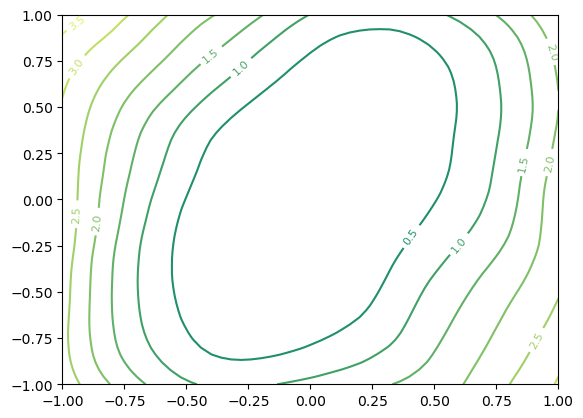

In [8]:
CS = plt.contour(x, y, losses, cmap='summer')
plt.clabel(CS, inline=1, fontsize=8)